# EDA for Multidimensional Poverty Index in developing countries and How it affects the freeness of a country






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_excel("Multidimensional Poverty Index____.xls", header = 2, nrows = 102)
labels1 = pd.read_excel("Aggregate_Category_and_Subcategory_Scores_FIW_2003-2022.xlsx", sheet_name = 1)

### Data Cleaning for Multidimensional Poverty Index

1. Rename useful column names which are unnamed to that present in the dataset
2. There exists an empty column 'b' filled with NAs so, delete that
3. Drop the first row as it has column names
4. Reset the index of the dataframe
5. Clean missing values

In [3]:

df = df.rename(columns = {'Unnamed: 0':'Country', 'Unnamed: 18': 'Population vulnerable to multidimensional poverty'})

df = df.drop(df.filter(regex='Unnamed:').columns, axis=1)
df = df.drop('b', axis = 1)

df = df.drop(0)
df = df.reset_index(drop = True)

# replace missing values not represented by NaN with it
df = df.replace('..', np.NaN)

df


,Country,Year and survey,Index,Headcount,Intensity of deprivation,Number of poor (year of the survey),Number of poor (2017),Inequality among the poor,Population in severe multidimensional poverty,Population vulnerable to multidimensional poverty,Health,Education,Standard of living,National poverty line,PPP $1.90 a day
0,Afghanistan,2015/2016 D,0.271721,55.910242,48.599550,19376.271484,19864.955078,0.020,24.861951,18.137625,10.009383,44.988769,45.001850,54.5,NaN
1,Albania,2017/2018 D,0.002748,0.703561,39.056706,20.645042,20.615662,NaN,0.067062,5.040320,28.259981,55.054617,16.685401,14.3,1.1
2,Algeria,2012/2013 M,0.008152,2.100729,38.806799,805.389282,867.982178,0.006,0.278065,5.836775,29.949945,46.842086,23.207971,5.5,0.5
3,Angola,2015/2016 D,0.282435,51.104110,55.266601,14724.864258,15220.947266,0.024,32.457551,15.542856,21.164586,32.050019,46.785396,36.6,30.1
4,Armenia,2015/2016 D,0.000675,0.186516,36.213946,5.455249,5.465758,NaN,0.000000,2.717535,33.111387,36.774689,30.113921,25.7,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Vanuatu,2007 M,0.173883,38.762772,44.858220,85.259880,107.079826,0.012,10.158028,32.295159,21.350864,22.457635,56.191498,12.7,13.1
97,Viet Nam,2013/2014 M,0.019334,4.895178,39.496365,4530.238281,4676.892090,0.010,0.725191,5.619922,15.220372,42.624530,42.155096,9.8,2.0
98,Yemen,2013 D,0.240735,47.698307,50.470251,12199.472656,13474.971680,0.021,23.885250,22.074686,28.296483,30.747494,40.956020,48.6,18.8
99,Zambia,2013/2014 D,0.261341,53.243721,49.083820,8317.187500,9101.550781,0.017,24.182746,22.481249,23.734817,22.517134,53.748053,54.4,57.5


### Data Cleaning for Aggregate Category and Subcategory Scores

1. Drop unnamed columns which don't have any data
2. Rename the column to match with that of the main dataframe
3. There is an empty coulmn 'x' which marks the last coulmn of the dataset, delete that
4. Get only the data from 2018 as the Multidimensional Poverty Index has data for that year
5. Reset the indices for readability

In [4]:

labels = labels1.drop(labels1.filter(regex='Unnamed:').columns, axis=1)
labels = labels.rename(columns = {'Country/Territory': 'Country'})
labels = labels.drop(['x', 'Add Q', 'Add A'], axis = 1)
labels = labels[labels['Edition'] == 2018]
labels = labels.reset_index(drop = True)
labels.head(5)


,Country,Region,C/T?,Edition,Status,PR Rating,CL Rating,A,B,C,PR,D,E,F,G,CL,Total
0,Abkhazia,Eurasia,t,2018,PF,4,5,6,8,4,18,8,6,4,5,23,41
1,Afghanistan,Asia,c,2018,NF,5,6,2,7,3,12,6,4,2,2,14,26
2,Albania,Europe,c,2018,PF,3,3,8,13,7,28,13,9,9,9,40,68
3,Algeria,Africa,c,2018,NF,6,5,3,4,3,10,7,5,6,7,25,35
4,Andorra,Europe,c,2018,F,1,1,12,15,12,39,15,11,15,16,57,96


### Transformation

Merge the two datasets to get the freedom rating for each of developing countries present in the multidimensional poverty index. This is done to get only the labels of each country and to explore the dataset of poverty in a way such that each country's statistics can be checked with only the freedom labels extracted from the other dataset.

In [5]:
merged = pd.merge(df, labels[['Country', 'Status']], on =['Country'], how = 'left')
merged

,Country,Year and survey,Index,Headcount,Intensity of deprivation,Number of poor (year of the survey),Number of poor (2017),Inequality among the poor,Population in severe multidimensional poverty,Population vulnerable to multidimensional poverty,Health,Education,Standard of living,National poverty line,PPP $1.90 a day,Status
0,Afghanistan,2015/2016 D,0.271721,55.910242,48.599550,19376.271484,19864.955078,0.020,24.861951,18.137625,10.009383,44.988769,45.001850,54.5,NaN,NF
1,Albania,2017/2018 D,0.002748,0.703561,39.056706,20.645042,20.615662,NaN,0.067062,5.040320,28.259981,55.054617,16.685401,14.3,1.1,PF
2,Algeria,2012/2013 M,0.008152,2.100729,38.806799,805.389282,867.982178,0.006,0.278065,5.836775,29.949945,46.842086,23.207971,5.5,0.5,NF
3,Angola,2015/2016 D,0.282435,51.104110,55.266601,14724.864258,15220.947266,0.024,32.457551,15.542856,21.164586,32.050019,46.785396,36.6,30.1,NF
4,Armenia,2015/2016 D,0.000675,0.186516,36.213946,5.455249,5.465758,NaN,0.000000,2.717535,33.111387,36.774689,30.113921,25.7,1.4,PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Vanuatu,2007 M,0.173883,38.762772,44.858220,85.259880,107.079826,0.012,10.158028,32.295159,21.350864,22.457635,56.191498,12.7,13.1,F
97,Viet Nam,2013/2014 M,0.019334,4.895178,39.496365,4530.238281,4676.892090,0.010,0.725191,5.619922,15.220372,42.624530,42.155096,9.8,2.0,NaN
98,Yemen,2013 D,0.240735,47.698307,50.470251,12199.472656,13474.971680,0.021,23.885250,22.074686,28.296483,30.747494,40.956020,48.6,18.8,NF
99,Zambia,2013/2014 D,0.261341,53.243721,49.083820,8317.187500,9101.550781,0.017,24.182746,22.481249,23.734817,22.517134,53.748053,54.4,57.5,PF


## Visualizations for EDA

Based on the poverty index and the freedom rating of a country, we can do EDA to find meaningful relationships and trends among the two if there are any.

### Relationship of Freedom with Population Vulnerable to Poverty

This graph shows the distribution of population vulnerable to multidimensional poverty in each freedom category, i.e., it shows the distribution of the percent of population at risk of poverty in each category.

From the graph we see that the median range of population at risk for not free countries is the highest and 25% of the data lies between 15 and 20. The range of distribution for partially free countries is the highest followed by free countries. In not fre countries there is a higher percent of people susceptible to poverty as they are densely populated after the median whereas is in free countries it is much lower as it is equally distributed.

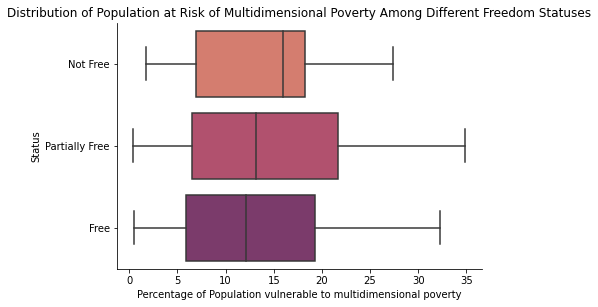

In [6]:
 y_axis_labels = ['Not Free', 'Partially Free', 'Free'] 

def vis1():
    ax = sns.catplot(
        y = 'Status', 
        x = 'Population vulnerable to multidimensional poverty', 
        data = merged, 
        kind = "box",
        orient= "h",
        palette = "flare",
    )

    ax.set(xlabel = "Percentage of Population vulnerable to multidimensional poverty", title = "Distribution of Population at Risk of Multidimensional Poverty Among Different Freedom Statuses")

    plt.yticks([0,1,2],y_axis_labels)

    ax.fig.set_figwidth(6)
    ax.fig.set_figheight(4)
    
vis1()



### Relationship of Freedom with Intensity of Deprivation

This graph explores the distribution of intensity of deprivation for poor people in each freedom category, i.e., it shows the distribution of the average deprivation score of health, education and standard of living in each freedom category for developing countries.

The graph shows that in countries that are not free there is a large range of intensity of deprivation and 50% of the data lies between 40 and 55. This means that the intensity of deprivation for poor people is the most in not free and partially free countries. Free countries have the smallest and least intensity of deprivation among poor people. This shows a clear relationship between the freedom of a country and how deprived the poor people are. There are a few outliers in free countries but the trend suggests that NF and PF countries are most deprived.

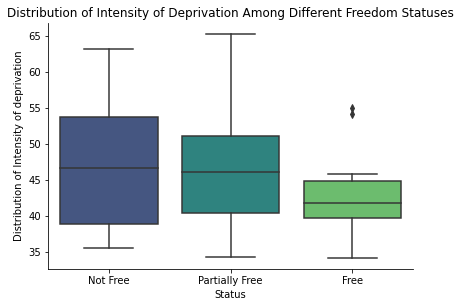

In [7]:
def vis2():
    ax = sns.catplot(x = 'Status', y = 'Intensity of deprivation', data = merged, kind = "box", palette = "viridis")
    ax.set(title = "Distribution of Intensity of Deprivation Among Different Freedom Statuses", ylabel = "Distribution of Intensity of deprivation" )
    plt.xticks([0,1,2],y_axis_labels)
    ax.fig.set_figwidth(6)
    ax.fig.set_figheight(4)
vis2()

### Poverty in Countries Based On Their Freedom State

This graph shows how much percentage of the population among the various developing countries is in multidimensional poverty for the different freedom statuses.

The graph distinctly shows that the countries that are not free have the highest poverty rate and the countries that are free have the lowest with partially free moderate compared to the other two. This shows a relation between poverty and freeness of a country, especially for developing countries.

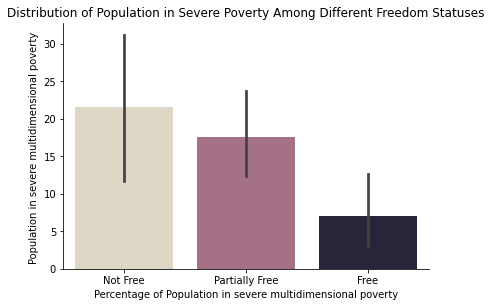

In [8]:
def vis3():
    ax = sns.catplot(x = 'Status', y = 'Population in severe multidimensional poverty ', data = merged, kind = 'bar', palette = "ch:s=-.2,r=.6")
    ax.set(xlabel = "Percentage of Population in severe multidimensional poverty", title = "Distribution of Population in Severe Poverty Among Different Freedom Statuses")
    plt.xticks([0,1,2],y_axis_labels)
    ax.fig.set_figwidth(6)
    ax.fig.set_figheight(4)
vis3()

## Conclusion

From the above EDA a possible hypothesis is that the freeness of a country is dependent on the poverty of the country. Countries with a high poverty rate tend to be not free and thier poor people are intensively deprived of basic needs such as Education, Health and Standard of Living. 


In [9]:
def plotEDAvisualizations():
    vis1()
    vis2()
    vis3()
# plotEDAvisualizations()

# Machine Learning

In [10]:
mergedML = pd.merge(df, labels, on =['Country'], how = 'left')
mergedML = mergedML.drop(['C/T?', 'Edition', 'Total', 'Region', 'Year and survey'], axis = 1)
mergedML = mergedML.dropna()
mergedML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 2 to 100
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            69 non-null     object 
 1   Index                                              69 non-null     float64
 2   Headcount                                          69 non-null     float64
 3   Intensity of deprivation                           69 non-null     float64
 4   Number of poor (year of the survey)                69 non-null     float64
 5   Number of poor (2017)                              69 non-null     float64
 6   Inequality among the poor                          69 non-null     float64
 7   Population in severe multidimensional poverty      69 non-null     float64
 8   Population vulnerable to multidimensional poverty  69 non-null     float64
 9   Health     

In [11]:
y = mergedML['Status']
# mergedX = mergedML.drop('Status',  axis = 1)

X_train, X_test, y_train, y_test = train_test_split(mergedML,y, test_size=0.2, random_state = 1)
# print(train.shape)
# print(test.shape)
# X_train = pd.DataFrame(X_train)
X_train = X_train.drop(['Status', 'Country'], 1)
X_test = X_test.drop(['Status', 'Country'], 1)
# y_train = np.array(y)

X_train
y_train.size
# X_train.dropna()

/var/folders/gx/nqqh_rw924l7b08y2726_zr80000gn/T/ipykernel_27985/1539505009.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train = X_train.drop(['Status', 'Country'], 1)
/var/folders/gx/nqqh_rw924l7b08y2726_zr80000gn/T/ipykernel_27985/1539505009.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_test = X_test.drop(['Status', 'Country'], 1)


55

In [17]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(kernel = 'linear',gamma='auto')))


In [18]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.818182 (0.099586)
KNN: 0.327273 (0.092709)
CART: 0.909091 (0.114992)
SVM: 0.872727 (0.123315)


In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 1.0
[[ 4  0]
 [ 0 10]]
              precision    recall  f1-score   support

           F       1.00      1.00      1.00         4
          PF       1.00      1.00      1.00        10

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [16]:
# X = np.array(train.drop(['Status', 'Country'], 1).astype(float))
# y = np.array(train['Status'])



# from sklearn.cluster import KMeans
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X_scaled)

# correct = 0
# for i in range(len(X)):
#     predict_me = np.array(X[i].astype(float))
#     predict_me = predict_me.reshape(-1, len(predict_me))
#     prediction = kmeans.predict(predict_me)
#     if prediction[0] == y[i]:
#         correct += 1

# # print(correct/len(X))